In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# FantasyToolz stat-scraping library
import mlbstatscraping as mss

# probability helpers
from scipy.stats import beta, binom
from scipy.odr import ODR, Model, RealData



In [2]:
print(2+2)

4


In [3]:
teams = ['LAA', 'HOU', 'ATH', 'TOR', 'ATL', 'MIL', 'STL','CHC', 'AZ', 'LAD', 'SF', 'CLE', 'SEA', 'MIA','NYM', 'WSH', 'BAL', 'SD', 'PHI', 'PIT', 'TEX','TB', 'BOS', 'CIN', 'COL', 'KC', 'DET', 'MIN','CWS', 'NYY']
mlbteams = {'Athletics': 'ATH', 'Pittsburgh Pirates': 'PIT', 'Seattle Mariners': 'SEA', 'San Diego Padres': 'SD', 'Kansas City Royals': 'KC', 'Miami Marlins': 'MIA', 'Minnesota Twins': 'MIN', 'Tampa Bay Rays': 'TB', 'Arizona Diamondbacks': 'AZ', 'Washington Nationals': 'WSH', 'Houston Astros': 'HOU', 'Toronto Blue Jays': 'TOR', 'Boston Red Sox': 'BOS', 'Cleveland Guardians': 'CLE', 'Los Angeles Dodgers': 'LAD', 'Cincinnati Reds': 'CIN', 'New York Mets': 'NYM', 'Atlanta Braves': 'ATL', 'Baltimore Orioles': 'BAL', 'Milwaukee Brewers': 'MIL', 'St. Louis Cardinals': 'STL', 'Texas Rangers': 'TEX', 'San Francisco Giants': 'SF', 'Colorado Rockies': 'COL', 'Chicago Cubs': 'CHC', 'Los Angeles Angels': 'LAA', 'Detroit Tigers': 'DET', 'Philadelphia Phillies': 'PHI', 'Chicago White Sox': 'CWS', 'New York Yankees': 'NYY'}
year = '2025'

Record = dict()

for team in teams:
    T = np.genfromtxt('/Users/mpetersen/FantasyBaseball/mlb-predictions/data/{}/teams/{}.csv'.format(year,team),dtype=[('date', 'S10'), ('team', 'S3'), ('opponent', 'S3'), ('rundiff', '<i8'), ('runsscored', '<i8'), ('rundiffI', '<i8'), ('runsscoredI', '<i8'),('pitcher','S20'),('opppitcher','S20')],delimiter=',')
    T = pd.DataFrame(T)
    Record[team] = np.sum(T['rundiff']>0)
    

LAA matrix norm: 370.02702603999074
LAA record: 49
HOU matrix norm: 291.49271002891305
HOU record: 60
ATH matrix norm: 308.7782375751245
ATH record: 43
TOR matrix norm: 307.3011552207378
TOR record: 61
ATL matrix norm: 342.4353953667757
ATL record: 44
MIL matrix norm: 341.3356119715609
MIL record: 60
STL matrix norm: 389.64599317842345
STL record: 49
CHC matrix norm: 432.75166088647194
CHC record: 60
AZ matrix norm: 357.19182521440774
AZ record: 50
LAD matrix norm: 375.71265616159377
LAD record: 49
SF matrix norm: 308.12010645201326
SF record: 54
CLE matrix norm: 364.8506543779249
CLE record: 48
SEA matrix norm: 383.3353623134709
SEA record: 55
MIA matrix norm: 296.07431499540786
MIA record: 48
NYM matrix norm: 349.5597230803343
NYM record: 58
WSH matrix norm: 359.76659100033174
WSH record: 39
BAL matrix norm: 286.80655501574574
BAL record: 43
SD matrix norm: 481.4187366524074
SD record: 55
PHI matrix norm: 389.60492810024874
PHI record: 55
PIT matrix norm: 317.28851224083104
PIT recor

Text(0, 0.5, 'Similarity Matrix Norm')

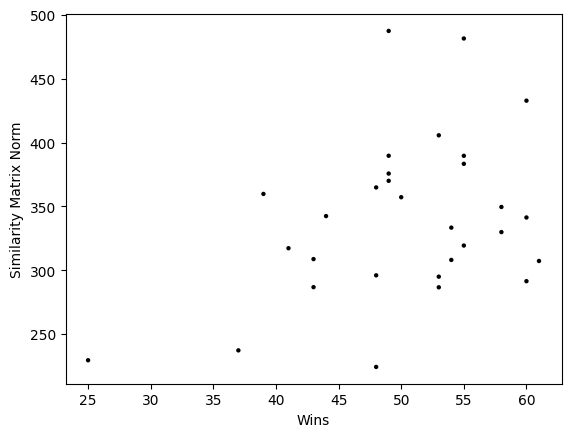

In [4]:
teams = ['LAA', 'HOU', 'ATH', 'TOR', 'ATL', 'MIL', 'STL','CHC', 'AZ', 'LAD', 'SF', 'CLE', 'SEA', 'MIA','NYM', 'WSH', 'BAL', 'SD', 'PHI', 'PIT', 'TEX','TB', 'BOS', 'CIN', 'COL', 'KC', 'DET', 'MIN','CWS', 'NYY']


#teams = ['MIN']
year = '2025'
outdir = ''

for team in teams:
    D = pd.read_csv('../data/{}{}/{}.csv'.format(outdir,year,team))

    # allocate a big ol' matrix

    ngames = len(D)
    similarity = np.zeros((ngames, ngames))

    for n in range(ngames):
        for m in range(ngames):
            if n >= m:
                continue
            # calculate the similarity between two games
            # similarity is the number of players in common
            for p in D.columns:
                if ('lineup' not in p):
                    continue
                if D[p][n] == D[p][m]:
                    similarity[n][m] += 1
                    similarity[m][n] += 1

    #print('{} most similar to game 1:  {}'.format(team, np.argmax(similarity[0])))
    print('{} matrix norm: {}'.format(team,np.linalg.norm(similarity)))
    print('{} record: {}'.format(team, Record[team]))
    plt.scatter(Record[team], np.linalg.norm(similarity),edgecolor='none',facecolor='black',s=10.)

plt.xlabel('Wins')
plt.ylabel('Similarity Matrix Norm')
    #plt.imshow(similarity, cmap='hot', interpolation='nearest')
    #plt.savefig('similarities/{}_{}.png'.format(team, year), dpi=300)


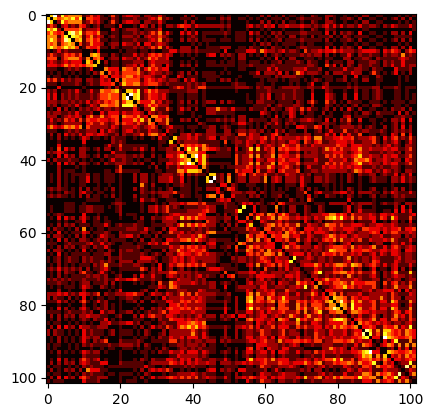